In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
train=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/train.csv')
test=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/test.csv')
submit=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/sample_submission.csv')

In [3]:
train.isna().sum().sum()

0

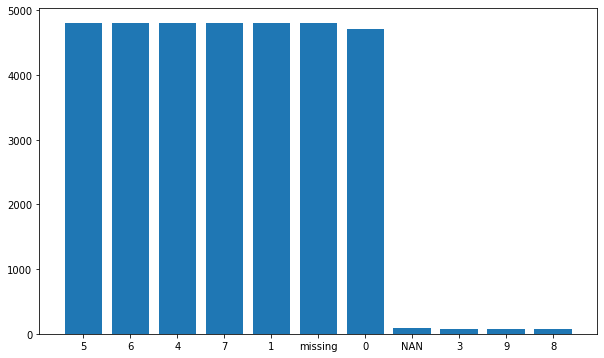

In [4]:
# 데이터 불균형
# 이상 label 발견. label의 object화. 즉, 숫자로 바꿔준다. 

temp=train['label'].value_counts()

fig,ax=plt.subplots(1,1,figsize=(10,6))

ax.bar(temp.index,temp)

plt.show()

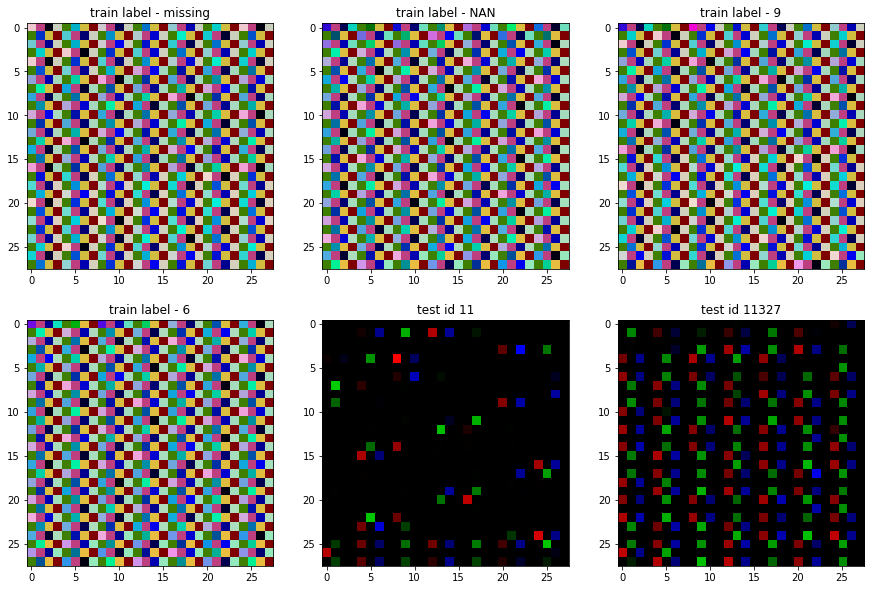

In [5]:
# https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image

from PIL import Image

# test 0번 이상하다. 
# 데이터 분석을 포기한다. 
# 관건은 모델링인것 같다.

# test는 test끼리 비슷하고, train은 train끼리 비슷하다.
# 전처리를 바꿔줘야 할 듯 싶다.

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0,0].imshow(Image.fromarray(train.iloc[33838][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,0].set_title('train label - missing')

ax[0,1].imshow(Image.fromarray(train.iloc[3][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,1].set_title('train label - NAN')

ax[0,2].imshow(Image.fromarray(train.iloc[1][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,2].set_title('train label - 9')

ax[1,0].imshow(Image.fromarray(train.iloc[2][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[1,0].set_title('train label - 6')

ax[1,1].imshow(Image.fromarray(test.iloc[0][1:].to_numpy().reshape(28,28),'RGB'))
ax[1,1].set_title('test id 11')

ax[1,2].imshow(Image.fromarray(test.iloc[1613][1:].to_numpy().reshape(28,28),'RGB'))
ax[1,2].set_title('test id 11327')

plt.show()

In [43]:
train

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,missing
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0,6
3,3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0,NAN
4,4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,59990,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,...,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0,0
33836,59991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33837,59992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33838,59993,0,0,0,0,0,0,1,0,0,0,56,0,0,0,0,0,112,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,130,224,...,9,10,16,7,0,229,244,148,0,0,0,0,0,0,12,125,136,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,113,9,0,0,0,missing


In [44]:
X_train=train.drop('id',axis=1)
X_train=X_train.drop('label',axis=1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,244,...,245,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0
33836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33838,0,0,0,0,0,0,1,0,0,0,56,0,0,0,0,0,112,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,130,224,192,...,1,9,10,16,7,0,229,244,148,0,0,0,0,0,0,12,125,136,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,113,9,0,0,0


In [45]:
picture=X_train.values

In [46]:
picture = picture.reshape((-1,28,28))

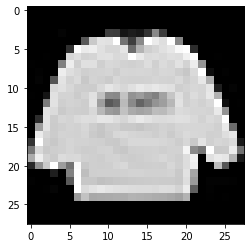

In [56]:
plt.imshow(picture[0], cmap='gray')